# Project 02 - Due Friday, November 11 at 12pm

*Objectives*: Gain experience loading a transactional dataset into a relational database model you define yourself and using SQL to explore its contents. Transform the data into a star schema, documenting the schema visually, and explore the transformed data analytically by writing and executing a number of SQL queries using common syntax and functions and describing your findings.  Gain practice working on these tasks with a partner.

*Grading criteria*: The tasks should all be completed, and questions should all be answered with SQL queries, diagrams, and charts in the space provided, unless a text answer is requested.  The notebook itself should be completely reproducible at datanotebook.org, from start to finish: another person should be able to use the same code to obtain the same results as yours.  Note that you will receive no more than partial credit if you do not add text/markdown cells explaining your thinking at each major step in each problem.

*Attestation*: **Work in pairs**.  At the end of your submitted notebook, identify the work each partner performed and attest that each contributed substantially to the work.

*Deadline*: Friday, November 11, 12pm.  One member of each pair must submit your notebook to Blackboard; you should not both submit it separately.  You may each push a copy to your own GitHub repository.


## Setup - select and obtain data

The US City Open Data Census has a variety of [transactional data from all over the country](http://us-city.census.okfn.org/).  Select one topic and one city from this Census, download the data, and explain your reason for this choice before proceeding.  Provide a link to the web page for the data set you've chosen.

I strongly encourage you to select a dataset from among the following topics:  Crime, Property Assessment, Campaign Finance Contributions, Service Requests (311), and Web Analytics.

By *transactional* data I mean records at the grain of one event per business process.  In the case of Service Requests (311), for example, that would require data at the level of each individual report of a service request.  If this isn't clear, think about the bike trip data - each individual ride was included - and look for data at that level of event/process specificity.  Avoid data like the Connecticut boating data, which was summarized by year, not individual transactions.

Please aim for a dataset of at least 10,000 individual records, but less than 250,000 records.  A little more or a little less is okay, but try to stay within these limits.

#### We choose the Crime  dataset for DC for recent 3 years. (2014~2016) http://opendata.dc.gov/datasets/bda20763840448b58f8383bae800a843_26?uiTab=table

In [1]:
!wget http://opendata.dc.gov/datasets/bda20763840448b58f8383bae800a843_26.csv
!wget http://opendata.dc.gov/datasets/35034fcb3b36499c84c94c069ab1a966_27.csv
!wget http://opendata.dc.gov/datasets/6eaf3e9713de44d3aa103622d51053b5_9.csv

--2016-11-11 18:10:08--  http://opendata.dc.gov/datasets/bda20763840448b58f8383bae800a843_26.csv
Resolving opendata.dc.gov (opendata.dc.gov)... 52.54.131.108, 52.206.141.71
Connecting to opendata.dc.gov (opendata.dc.gov)|52.54.131.108|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘bda20763840448b58f8383bae800a843_26.csv.6’

bda20763840448b58f8     [ <=>                  ]   7.55M  49.0MB/s   in 0.2s   

2016-11-11 18:10:09 (49.0 MB/s) - ‘bda20763840448b58f8383bae800a843_26.csv.6’ saved [7916885]

--2016-11-11 18:10:09--  http://opendata.dc.gov/datasets/35034fcb3b36499c84c94c069ab1a966_27.csv
Resolving opendata.dc.gov (opendata.dc.gov)... 52.206.141.71, 52.54.131.108
Connecting to opendata.dc.gov (opendata.dc.gov)|52.206.141.71|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘35034fcb3b36499c84c94c069ab1a966_27.csv.6’

35034fcb3b36499c84c     [    <=>               ]  

## Problem 1 - examine the data (20 points)

Use `csvstat`, `pandas`, or other tools as you see fit and observe the contents of your dataset.  Review important points from any metadata provided.  Describe what you see:  What do the columns mean?  Are there null values?  Which columns interest you the most?  Which columns present some opportunities, challenges, or questions you would like to ask?

In [2]:
!csvcut -n bda20763840448b58f8383bae800a843_26.csv

  1: ﻿X
  2: Y
  3: OBJECTID
  4: CCN
  5: REPORTDATETIME
  6: SHIFT
  7: OFFENSE
  8: METHOD
  9: LASTMODIFIEDDATE
 10: BLOCKSITEADDRESS
 11: BLOCKXCOORD
 12: BLOCKYCOORD
 13: WARD
 14: ANC
 15: DISTRICT
 16: PSA
 17: NEIGHBORHOODCLUSTER
 18: BUSINESSIMPROVEMENTDISTRICT
 19: BLOCK_GROUP
 20: CENSUS_TRACT
 21: VOTING_PRECINCT
 22: START_DATE
 23: END_DATE


In [3]:
!shuf -n 10000 bda20763840448b58f8383bae800a843_26.csv | csvstat

  1. -77.0257466964
	<class 'str'>
	Nulls: False
	Unique values: 4165
	5 most frequent values:
		-77.032732849:	76
		-77.0639999283:	40
		-77.0853018915:	39
		-77.0436092615:	36
		-77.0106313111:	35
	Max length: 14
  2. 38.9692850897
	<class 'str'>
	Nulls: False
	Unique values: 4165
	5 most frequent values:
		38.9295208052:	76
		38.9051583382:	40
		38.9599152513:	39
		38.9099352176:	36
		38.9002117807:	35
	Max length: 13
  3. 300826
	<class 'str'>
	Nulls: False
	Unique values: 9999
	Max length: 8
  4. 16147502
	<class 'str'>
	Nulls: False
	Unique values: 9998
	5 most frequent values:
		16177640:	2
		16129061:	1
		16026797:	1
		16012095:	1
		16159636:	1
	Max length: 8
  5. 2016/09/01 18:29:53+00
	<class 'str'>
	Nulls: False
	Unique values: 9990
	5 most frequent values:
		2016/03/18 17:59:38+00:	2
		2016/10/04 13:11:45+00:	2
		2016/07/15 00:00:00+00:	2
		2016/09/02 00:00:00+00:	2
		2016/08/08 00:00:00+00:	2
	Max length: 22
  6. EVENING
	<class 'str'>
	Nulls: False
	Values: MIDNIGHT, SHIF

#### Null value exsits in the 15,16,17,18,19,20,23 column

### Column description 

1. X: The coordinate that indicates the geographical information
2. Y: The coordinate that indicates the geographical information
3. OBJECTID: The identical set of numbers that is used for the purpose of referencing each unique crime
4. CCN: Criminal Complaint Number: a unique identifier assigned by MPD to each incident report. Other law enforcement agencies also request and use CCNs for their reports
5. REPORTDATETIME: The date the offense was reported to MPD, which may be later than the date the offense actually occurred 
6. SHIFT:  MPD member's tour of duty associated with the time the report was taken. Day shift generally runs between 0700 and 1500 (military time); evening shift between 1500 and 2300, and midnight shift between 2300 and 0700. If the shift is unknown, the field will say "UNK"
possible discussion - which type of crime is more likely to occur during day/evening/midnight 
7. OFFENSE: Types of offense  
8. METHOD: Method used when commiting crime. Either gun, knife or others. possible discussion - not so informative since "others" being the majority, could probably eliminate the column  
9. LASTMODIFIEDDATE
10.BLOCKSITEADDRESS : block address provided; specific addresses are not available
11. BLOCKXCOORD
12. BLOCKYCOORD
13. WARD
14. ANC : Advisory Neighborhood Commissions
15. DISTRICT : Police Districts (http://mpdc.dc.gov/page/police-districts-and-police-service-areas)
16. PSA : Police Service Areas (http://mpdc.dc.gov/page/police-districts-and-police-service-areas)
17. NEIGHBORHOODCLUSTER: http://www.neighborhoodinfodc.org/nclusters/nclusters.html noted that GWU belongs to cluster 5
18. BUSINESSIMPROVEMENTDISTRICT
19. BLOCK_GROUP
20. CENSUS_TRACT: groupings divided by the presentation of census data
21. VOTING_PRECINCT: location divided by the voting areas
22. START_DATE :  Earliest date the incident could have occurred
23. END_DATE : Latest date the incident could have occurred

#### Which columns interest you the most? questions you would like to ask?
We are curious about what offense types are most likely to occur around us near GWU (which is neighborhoodcluster 5), and the distribution of the most frequent offense type that shows us the trend over time for recent 3 years.

## Problem 2 - define a database model, load the data, and explore (20 points)

Based on what you found above, create and connect to a new database, define a database table in it, and load this dataset into it.  You may use either of the methods for this step you have seen in earlier class notebooks.  You may choose to eliminate variables/columns if they are not relevant or interesting to you - explain your reasoning if you do.  Either way, you should load a majority of the columns present in the source dataset as it is in its raw form into the database, and all of its rows.

Once your data has loaded successfully, run a `COUNT(*)` query to verify that all the data has loaded correctly.

Explore the data to zero in on a few themes you would like to further study analytically.  Discuss columns that present opportunities for extraction into dimensions, and identify the specific columns that contain facts you want to measure.

### 1. Create and define database

In [4]:
%load_ext sql

/opt/conda/lib/python3.5/site-packages/IPython/config.py:13: ShimWarning: The `IPython.config` package has been deprecated. You should import from traitlets.config instead.
  "You should import from traitlets.config instead.", ShimWarning)
/opt/conda/lib/python3.5/site-packages/IPython/utils/traitlets.py:5: UserWarning: IPython.utils.traitlets has moved to a top-level traitlets package.
  warn("IPython.utils.traitlets has moved to a top-level traitlets package.")


In [5]:
!echo 'redspot' | sudo -S service postgresql restart

[sudo] password for jovyan: Restarting PostgreSQL 9.5 database server: main.


In [6]:
!createdb -U dbuser project02

createdb: database creation failed: ERROR:  database "project02" already exists


In [7]:
%sql postgresql://dbuser@localhost:5432/project02

'Connected: dbuser@project02'

In [8]:
%%sql
DROP TABLE IF EXISTS crime;
CREATE TABLE crime(
    X FLOAT,
    Y FLOAT,
    OBJECTID INTEGER,
    CCN INTEGER,
    REPORTDATETIME TIMESTAMP,                                                    
    SHIFT TEXT,
    OFFENSE TEXT,                                    
    METHOD TEXT, 
    LASTMODIFIEDDATE DATE,
    BLOCKSITEADDRESS TEXT,
    BLOCKXCOORD NUMERIC,
    BLOCKYCOORD NUMERIC,
    WARD TEXT,
    ANC TEXT,
    DISTRICT TEXT,
    PSA TEXT,
    NEIGHBORHOODCLUSTER TEXT,
    BUSINESSIMPROVEMENTDISTRICT TEXT,
    BLOCK_GROUP TEXT,
    CENSUS_TRACT TEXT,
    VOTING_PRECINCT TEXT,
    START_DATE DATE,
    END_DATE DATE
)

Done.
Done.


[]

### 2. Load data

We are going to use the crime incidents data for recent 3 years (2014~2016).

In [9]:
%%sql
COPY crime FROM '/home/jovyan/work/bda20763840448b58f8383bae800a843_26.csv'
CSV
NULL AS ''
HEADER
QUOTE '"'
DELIMITER ',';
COPY crime FROM '/home/jovyan/work/35034fcb3b36499c84c94c069ab1a966_27.csv'
CSV
NULL AS ''
HEADER
QUOTE '"'
DELIMITER ',';
COPY crime FROM '/home/jovyan/work/6eaf3e9713de44d3aa103622d51053b5_9.csv'
CSV
NULL AS ''
HEADER
QUOTE '"'
DELIMITER ',';


30155 rows affected.
36564 rows affected.
38434 rows affected.


[]

CCN(Criminal Complaint Number) is a unique identifier assigned to each incident report,but we found that there are some redundant rows which share the same CCN. This must be an error, and we want to remove the redundant data for our analysis before we move on.

In [10]:
%%sql
DELETE FROM crime
WHERE objectid NOT IN (
    SELECT min(objectid)
    FROM crime
    GROUP BY ccn)

26 rows affected.


[]

In [11]:
%%sql
SELECT COUNT(*) FROM crime;

1 rows affected.


count
105127


### 3. Explore the data

#### We mainly would like to see "yearly/monthly trend of the number of crime incidents occured recently(for recent three years) by various offense types in different regions in Washington DC, especially in Foggy Bottom/GWU area." 
For this analysis purpose, facts, demensions and the columns that contain each of the concepts are below:

* Fact 
  - a crime incident inself --> There is no relevant column
* Dimensions : 
  - yearly/monthly trend --> 'start time'(The date the incident could have occurred)
  - offense types --> 'offense'
  - regions --> 'Xcoord, Ycoord', 'blocksite address', 'district', 'PSA(police service area)', 'Neighborhood cluster' (http://www.neighborhoodinfodc.org/nclusters/nclusters.html - GWU belongs to cluster 5)


#### Shown below is the information types that we want to obtain from the data which are all related to our analysis purpose mentioned above.

- the most commonly commited types of crime around GWU in 2016.

In [12]:
%%sql
SELECT offense, count(*)
FROM crime
WHERE neighborhoodcluster = '5' AND start_date >= '2016-01-01'
GROUP BY offense 
ORDER BY count(*) DESC;

7 rows affected.


offense,count
THEFT/OTHER,336
THEFT F/AUTO,109
ROBBERY,22
BURGLARY,22
MOTOR VEHICLE THEFT,16
ASSAULT W/DANGEROUS WEAPON,16
SEX ABUSE,4


To see the yearly/monthly trend, the relevant columns are added:

In [13]:
%%sql
ALTER TABLE crime ADD COLUMN year char(4);
ALTER TABLE crime ADD COLUMN month char(2);
ALTER TABLE crime ADD COLUMN yearmonth char(7);

UPDATE crime 
SET year =  TO_CHAR(start_date, 'YYYY'), 
    month = TO_CHAR(start_date, 'MM'), 
    yearmonth = TO_CHAR(start_date, 'YYYY-MM');

Done.
Done.
Done.
105127 rows affected.


[]

In [14]:
%matplotlib inline
import pandas as pd

- the number of crime incidents in DC (monthly) for recent 3 years

In [15]:
%%sql
SELECT yearmonth, count(*) as CrimeIncidents 
FROM crime WHERE yearmonth BETWEEN '2014-01' and '2016-10'
GROUP BY yearmonth 
ORDER BY yearmonth

34 rows affected.


yearmonth,crimeincidents
2014-01,2855
2014-02,2173
2014-03,2449
2014-04,2773
2014-05,3252
2014-06,3347
2014-07,3745
2014-08,3841
2014-09,3679
2014-10,3856


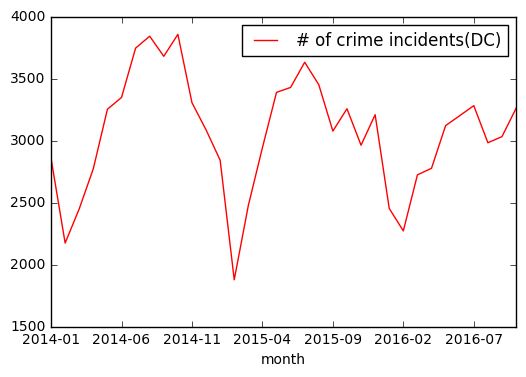

In [16]:
result = _
df = pd.DataFrame(result)
df.columns = ['month', '# of crime incidents(DC)']
df.plot(x = 'month', y = '# of crime incidents(DC)', color='Red')

- the number of crime incidents only in Foggy Bottom area (monthly) for recent 3 years

In [17]:
%%sql
SELECT yearmonth, count(*) as CrimeIncidents 
FROM crime 
WHERE yearmonth BETWEEN '2014-01' and '2016-10'AND neighborhoodcluster = '5'
GROUP BY yearmonth 
ORDER BY yearmonth;

34 rows affected.


yearmonth,crimeincidents
2014-01,32
2014-02,35
2014-03,39
2014-04,35
2014-05,61
2014-06,55
2014-07,56
2014-08,72
2014-09,71
2014-10,59


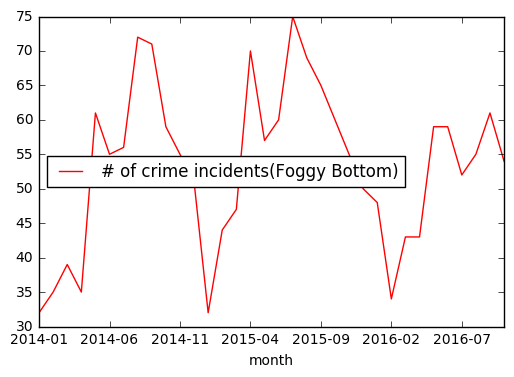

In [18]:
result = _
df = pd.DataFrame(result)
df.columns = ['month', '# of crime incidents(Foggy Bottom)']
df.plot(x = 'month', y = '# of crime incidents(Foggy Bottom)', color='Red')

- the number of crime incidents by different offense types (monthly) for recent 3 years

In [19]:
%%sql
SELECT yearmonth, offense, count(*)
FROM crime
WHERE yearmonth >= '2014-01'
GROUP BY yearmonth, offense
ORDER BY yearmonth, offense

305 rows affected.


yearmonth,offense,count
2014-01,ARSON,2
2014-01,ASSAULT W/DANGEROUS WEAPON,183
2014-01,BURGLARY,234
2014-01,HOMICIDE,11
2014-01,MOTOR VEHICLE THEFT,194
2014-01,ROBBERY,284
2014-01,SEX ABUSE,25
2014-01,THEFT F/AUTO,972
2014-01,THEFT/OTHER,950
2014-02,ARSON,2


In [20]:
%%sql
SELECT start_date, count(*)
FROM crime
WHERE neighborhoodcluster = '5' AND offense LIKE 'THEFT%' AND yearmonth >= '2016-10'
GROUP BY start_date
ORDER BY start_date ASC;

29 rows affected.


start_date,count
2016-10-01,2
2016-10-04,1
2016-10-05,1
2016-10-07,2
2016-10-10,2
2016-10-11,1
2016-10-13,1
2016-10-14,2
2016-10-15,2
2016-10-16,3


<Container object of 29 artists>

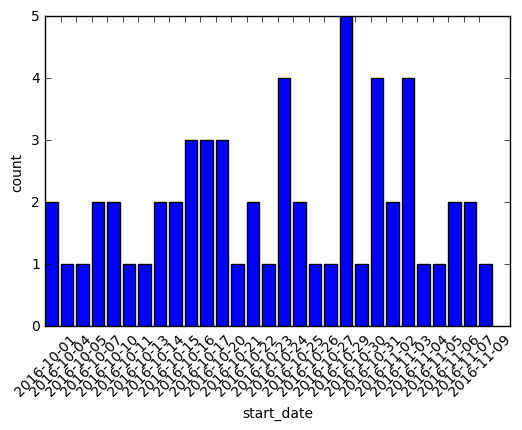

In [21]:
result = _
result.bar()

## Problem 3 - define a star schema, and load your data into it (30 points)

Define a star schema consisting of at least one fact table and at least two dimensions.  Transform your source data into the new fact table and dimensions.  Discuss your key modeling decisions.

Document your star schema with a diagram.  There several tools available for this, such as Google Docs and Microsoft Visio.

 ### 1. Define a star schema diagram: 

#### Dimension tables
For our analysis purpose mentioned in Question 2, we need to create dimension tables associated to Crime time, Offense type, Crime location. All these three are important information for our analysis, so we created dimension tables for each of them.

For Location, the most relevant information in the data is Neighborhood cluster since it has full description and the size of each cluster is appropriate for our purpose, so we separated it into another dimension. Although We do not use specific addresses or geolocation information in our current analysis, we made a separate location dimension table to include the info for future use since they could be useful. 

For analysis convenience, we made dimension tables rich. Time dimension table includes additional time data('year_month', etc'), and Offense and Cluster dimension tables have detailed code description.  

Besides the 5 dimension tables, we also want to include the possibility of adding other data for the future use. So we made a CrimeInfo table, a sort of junk table.
The first possibility is information that is criminal or victim related could be added to the DIM_Criminal table or the DIM_Criminal table. 
The second possibility is to expand the Washington, DC dataset to a national level which allows us to store crime data about other states and cities under the DIM_Location table.

(The diagram has Victim and Criminal tables although the original data do not include the data. If the data can be used in the future, the tables can be connected to the fact table as the diagram.)

#### Fact table
The grain of the fact table is 'every crime incidens', and we are now only interested in counting the crime incidents by time/offense/location. Therefore, our fact table does not (need to) have any numeric data, and it only has five surrogate keys. The data in the fact table are divided in crime incident level by the five dimension tables. 

In [22]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://s17.postimg.org/h9muovhkf/Star_Schema_Modeling.jpg")

### 2. Load the data into our star schema
#### Create a dimension table for Offense: 
In this table, we included type of offense, method used, and decided to create a column that shows the corresponding offense description for reference purpose.

In [23]:
%%sql
DROP TABLE IF EXISTS DIM_Offense;
CREATE TABLE DIM_Offense (
    offense_key SERIAL PRIMARY KEY,
    offense_type TEXT, 
    offense_desc TEXT, 
    method TEXT
);

Done.
Done.


[]

In [24]:
%%sql
INSERT INTO DIM_Offense (offense_type, method)
SELECT DISTINCT offense, method FROM crime;

25 rows affected.


[]

In [25]:
%%sql
UPDATE DIM_offense 
SET offense_desc = 'A Robbery committed by the sudden and stealthy seizure of a purse, wallet or other item from another persons possession, in his/her presence and without the use of overt force. Since no force is used this offense will be classified as a theft'
WHERE offense_type = 'ROBBERY';

UPDATE DIM_offense 
SET offense_desc = 'Killing of another purposely, or otherwise, with malice aforethought'
WHERE offense_type = 'HOMICIDE';

UPDATE DIM_offense 
SET offense_desc = 'A broad inclusion of Theft offenses including embezzlement, theft of services and fraud/false pretenses. The Theft/Other category excludes theft of items from a motor vehicle or the motor vehicle itself'
WHERE offense_type = 'THEFT/OTHER';

UPDATE DIM_offense 
SET offense_desc = 'The unlawful entry of a structure, vessel, watercraft, railroad car or yard where chattels are deposited with the intent to commit any criminal offense'
WHERE offense_type = 'BURGLARY';

UPDATE DIM_offense 
SET offense_desc = ' Wrongfully obtaining or using the property of another with the intent to deprive the owner of the items from within a vehicle, excluding motor vehicle parts and accessories'
WHERE offense_type = 'THEFT F/AUTO';

UPDATE DIM_offense 
SET offense_desc = 'The malicious burning, or attempt to burn, any structure, vessel, vehicle, railroad car or property of another'
WHERE offense_type = 'ARSON';

UPDATE DIM_offense 
SET offense_desc = 'The theft of any self-propelled, motor driven vehicle that is primarily intended to transport persons and property on a highway'
WHERE offense_type = 'MOTOR VEHICLE THEFT';

UPDATE DIM_offense 
SET offense_desc = 'Engaging in or causing another person to submit to a sexual act by force, threat or reasonable fear, involuntary impairment of the persons ability to appraise or control his or her conduct, rendering that other person unconscious or under conditions wherein a reasonable person would not believe that consent was freely and knowingly given. The most serious sex abuse categories are included in the reports of DC Code Index Violent Crimes: Sexual Assault and on the Crime Mapping Application. The figures reported in this category include First Degree Sex Abuse, Second Degree Sex Abuse, Attempted First Degree Sex Abuse and Assault with Intent to Commit First Degree Sex Abuse against adults. Data in this format is available online from 2011'
WHERE offense_type = 'SEX ABUSE';

UPDATE DIM_offense 
SET offense_desc = 'Knowingly or purposely causing serious bodily injury, threatening to do so, or knowingly engaging in conduct that creates a grave risk of serious bodily injury to another person'
WHERE offense_type = 'ASSAULT W/DANGEROUS WEAPON';

3 rows affected.
3 rows affected.
3 rows affected.
3 rows affected.
3 rows affected.
1 rows affected.
3 rows affected.
3 rows affected.
3 rows affected.


[]

#### Create a dimension table for Location

In [26]:
%%sql
DROP TABLE IF EXISTS DIM_Location;
CREATE TABLE DIM_Location (
    location_key SERIAL PRIMARY KEY,
    blocksite_address VARCHAR(100),
    xcoord FLOAT,
    ycoord FLOAT
);

Done.
Done.


[]

In [27]:
%%sql
INSERT INTO DIM_Location (blocksite_address, xcoord, ycoord)
SELECT DISTINCT
    BLOCKSITEADDRESS,
    X, Y
From crime;

14659 rows affected.


[]

#### Create a dimension table for Cluster

In [28]:
%%sql
DROP TABLE IF EXISTS DIM_Cluster;
CREATE TABLE DIM_Cluster (
    cluster_key SERIAL PRIMARY KEY,
    cluster_cd CHAR(2),
    cluster_desc VARCHAR(200)
);

Done.
Done.


[]

In [29]:
%%sql
INSERT INTO DIM_Cluster(
    cluster_cd)
SELECT DISTINCT
    NEIGHBORHOODCLUSTER
From crime;

40 rows affected.


[]

In [30]:
%%sql
UPDATE DIM_Cluster SET cluster_desc = 'Kalorama Heights, Adams Morgan, Lanier Heights' WHERE cluster_cd = '1';
UPDATE DIM_Cluster SET cluster_desc = 'Columbia Heights, Mt. Pleasant, Pleasant Plains, Park View' WHERE cluster_cd = '2';
UPDATE DIM_Cluster SET cluster_desc = 'Howard University, Le Droit Park, Cardozo/Shaw' WHERE cluster_cd = '3';
UPDATE DIM_Cluster SET cluster_desc = 'Georgetown, Burleith/Hillandale' WHERE cluster_cd = '4';
UPDATE DIM_Cluster SET cluster_desc = 'West End, Foggy Bottom, GWU' WHERE cluster_cd = '5';
UPDATE DIM_Cluster SET cluster_desc = 'Dupont Circle, Connecticut Avenue/K Street' WHERE cluster_cd = '6';
UPDATE DIM_Cluster SET cluster_desc = 'Shaw, Logan Circle' WHERE cluster_cd = '7';
UPDATE DIM_Cluster SET cluster_desc = 'Downtown, Chinatown, Penn Quarters, Mount Vernon Square, North Capitol Street' WHERE cluster_cd = '8';
UPDATE DIM_Cluster SET cluster_desc = 'Southwest Employment Area, Southwest/Waterfront, Fort McNair, Buzzard Point' WHERE cluster_cd = '9';
UPDATE DIM_Cluster SET cluster_desc = 'Hawthorne, Barnaby Woods, Chevy Chase' WHERE cluster_cd = '10';
UPDATE DIM_Cluster SET cluster_desc = 'Friendship Heights, American University Park, Tenleytown' WHERE cluster_cd = '11';
UPDATE DIM_Cluster SET cluster_desc = 'North Cleveland Park, Forest Hills, Van Ness' WHERE cluster_cd = '12';
UPDATE DIM_Cluster SET cluster_desc = 'Spring Valley, Palisades, Wesley Heights, Foxhall Crescent, Foxhall Village, Georgetown Reservoir' WHERE cluster_cd = '13';
UPDATE DIM_Cluster SET cluster_desc = 'Cathedral Heights, McLean Gardens, Glover Park' WHERE cluster_cd = '14';
UPDATE DIM_Cluster SET cluster_desc = 'Cleveland Park, Woodley Park, Massachusetts Avenue Heights, Woodland-Normanstone Terrace' WHERE cluster_cd = '15';
UPDATE DIM_Cluster SET cluster_desc = 'Colonial Village, Shepherd Park, North Portal Estates' WHERE cluster_cd = '16';
UPDATE DIM_Cluster SET cluster_desc = 'Takoma, Brightwood, Manor Park' WHERE cluster_cd = '17';
UPDATE DIM_Cluster SET cluster_desc = 'Brightwood Park, Crestwood, Petworth' WHERE cluster_cd = '18';
UPDATE DIM_Cluster SET cluster_desc = 'Lamond Riggs, Queens Chapel, Fort Totten, Pleasant Hill' WHERE cluster_cd = '19';
UPDATE DIM_Cluster SET cluster_desc = 'North Michigan Park, Michigan Park, University Heights' WHERE cluster_cd = '20';
UPDATE DIM_Cluster SET cluster_desc = 'Edgewood, Bloomingdale, Truxton Circle, Eckington' WHERE cluster_cd = '21';
UPDATE DIM_Cluster SET cluster_desc = 'Brookland, Brentwood, Langdon' WHERE cluster_cd = '22';
UPDATE DIM_Cluster SET cluster_desc = 'Ivy City, Arboretum, Trinidad, Carver Langston' WHERE cluster_cd = '23';
UPDATE DIM_Cluster SET cluster_desc = 'Woodridge, Fort Lincoln, Gateway' WHERE cluster_cd = '24';
UPDATE DIM_Cluster SET cluster_desc = 'NoMa, Union Station, Stanton Park, Kingman Park' WHERE cluster_cd = '25';
UPDATE DIM_Cluster SET cluster_desc = 'Capitol Hill, Lincoln Park' WHERE cluster_cd = '26';
UPDATE DIM_Cluster SET cluster_desc = 'Near Southeast, Navy Yard' WHERE cluster_cd = '27';
UPDATE DIM_Cluster SET cluster_desc = 'Historic Anacostia' WHERE cluster_cd = '28';
UPDATE DIM_Cluster SET cluster_desc = 'Eastland Gardens, Kenilworth' WHERE cluster_cd = '29';
UPDATE DIM_Cluster SET cluster_desc = 'Mayfair, Hillbrook, Mahaning Heights' WHERE cluster_cd = '30';
UPDATE DIM_Cluster SET cluster_desc = 'Deanwood, Burrville, Grant Park, Lincoln Heights, Fairmont Heights' WHERE cluster_cd = '31';
UPDATE DIM_Cluster SET cluster_desc = 'River Terrace, Benning, Greenway, Fort Dupont' WHERE cluster_cd = '32';
UPDATE DIM_Cluster SET cluster_desc = 'Capitol View, Marshall Heights, Benning Heights' WHERE cluster_cd = '33';
UPDATE DIM_Cluster SET cluster_desc = 'Twining, Fairlawn, Randle Highlands, Penn Branch, Fort Davis Park, Dupont Park' WHERE cluster_cd = '34';
UPDATE DIM_Cluster SET cluster_desc = 'Fairfax Village, Naylor Gardens, Hillcrest, Summit Park' WHERE cluster_cd = '35';
UPDATE DIM_Cluster SET cluster_desc = 'Woodland/Fort Stanton, Garfield Heights, Knox Hill' WHERE cluster_cd = '36';
UPDATE DIM_Cluster SET cluster_desc = 'Sheridan, Barry Farm, Buena Vista' WHERE cluster_cd = '37';
UPDATE DIM_Cluster SET cluster_desc = 'Douglass, Shipley Terrace' WHERE cluster_cd = '38';
UPDATE DIM_Cluster SET cluster_desc = 'Congress Heights, Bellevue, Washington Highlands' WHERE cluster_cd = '39';

1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.


[]

#### Create a dimension table for Time: 
In this table we want to provide different time scales that allows for referencing different time level. 

In [31]:
%%sql
DROP TABLE IF EXISTS DIM_Time;
CREATE TABLE DIM_Time(
    time_key SERIAL PRIMARY KEY,
    date Date, 
    quarter CHAR(1),
    year CHAR(4),
    month CHAR(2),
    day CHAR(2),
    day_of_week CHAR(3),
    year_month CHAR(7)
)

Done.
Done.


[]

In [32]:
%%sql
INSERT INTO DIM_Time (
    date,
    quarter,
    year,
    month,
    day,
    day_of_week,
    year_month)
SELECT DISTINCT
    start_date,
    TO_CHAR(start_date, 'Q'),
    TO_CHAR(start_date, 'YYYY'),
    TO_CHAR(start_date, 'MM'),
    TO_CHAR(start_date, 'DD'),
    TO_CHAR(start_date, 'DY'),
    TO_CHAR(start_date, 'YYYY-MM')
From crime;

1225 rows affected.


[]

#### Create a dimension table for CrimeInfo:
This table is the junk dimension table that covers the information that we found to be less related to the analytical concepts.


In [33]:
%%sql
DROP TABLE IF EXISTS DIM_CrimeInfo;
CREATE TABLE DIM_CrimeInfo(
    crimeinfo_key SERIAL PRIMARY KEY,
    ccn Integer,
    report_datetime TIMESTAMP,
    end_date DATE,
    psa CHAR(3),
    district TEXT
)

Done.
Done.


[]

In [34]:
%%sql
INSERT INTO DIM_CrimeInfo(
    ccn,
    report_datetime,
    end_date,
    psa,
    district)
SELECT DISTINCT
    CCN,
    REPORTDATETIME,
    END_DATE,
    PSA,
    DISTRICT
From crime;

105127 rows affected.


[]

In [35]:
%%sql
SELECT count(*) from crime
limit 10;

1 rows affected.


count
105127


#### Create the fact table for Crime:
This fact table will involve all the keys that refers to the dimension tables.

In [36]:
%%sql
DROP TABLE IF EXISTS FACT_Crime;
CREATE TABLE FACT_Crime (
    offense_key Integer, 
    location_key Integer,
    time_key Integer,
    cluster_key Integer,
    crimeinfo_key Integer
);

Done.
Done.


[]

In [37]:
%%sql
INSERT INTO FACT_Crime 
(offense_key, location_key, time_key, cluster_key, crimeinfo_key)
SELECT
    o.offense_key,
    l.location_key,
    t.time_key,
    cl.cluster_key,
    ci.crimeinfo_key
FROM Crime c
LEFT JOIN Dim_Offense o ON c.offense = o.offense_type AND c.method = o.method
LEFT JOIN Dim_Location l ON c.blocksiteaddress = l.blocksite_address AND c.X = l.xcoord AND c.Y = l.ycoord
LEFT JOIN Dim_Time t ON c.start_date = t.date
LEFT JOIN Dim_Cluster cl ON c.NEIGHBORHOODCLUSTER = cl.cluster_cd
LEFT JOIN DIM_CrimeInfo ci ON c.ccn = ci.ccn

105127 rows affected.


[]

## Problem 4 - explore your data in its new schema (30 points)

Strictly using the dimensional model tables you defined and populated for Problem 3, explore your data in its new form.  Use any of the query strategies we've seen in class, including transformations, aggregates, subqueries, rollups, and, of course, joins.  Add plots to highlight particular themes that stand out.  Describe your thinking and observations along the way.

### 1. As we did in Qustion 2 above, and addional search:
(aggregates, join, rollups, subqueries, plots)

In [38]:
%%sql
SELECT o.offense_type, count(*)
FROM dim_time t, fact_crime c, dim_offense o, dim_cluster cl
WHERE 
    c.time_key = t.time_key AND c.offense_key = o.offense_key AND c.cluster_key = cl.cluster_key
    AND cl.cluster_cd = '5'
    AND t.year >= '2016'
    GROUP BY o.offense_type
    ORDER BY count(*) desc;

7 rows affected.


offense_type,count
THEFT/OTHER,336
THEFT F/AUTO,109
ROBBERY,22
BURGLARY,22
MOTOR VEHICLE THEFT,16
ASSAULT W/DANGEROUS WEAPON,16
SEX ABUSE,4


In [39]:
%%sql
SELECT t.year_month, count(*)
FROM dim_time t, fact_crime c
WHERE t.time_key = c.time_key AND t.year_month between '2014-01' AND '2016-10'
GROUP BY t.year_month
ORDER BY year_month

34 rows affected.


year_month,count
2014-01,2855
2014-02,2173
2014-03,2449
2014-04,2773
2014-05,3252
2014-06,3347
2014-07,3745
2014-08,3841
2014-09,3679
2014-10,3856


We can see the monthly trend of crime incidents with these queries and charts. Interesting thing is, it shows an obvious seasonal trend. The number of crime occurred is very low in the beginning of each year, and is increasing, and becomes the highest in summer(July~September). 

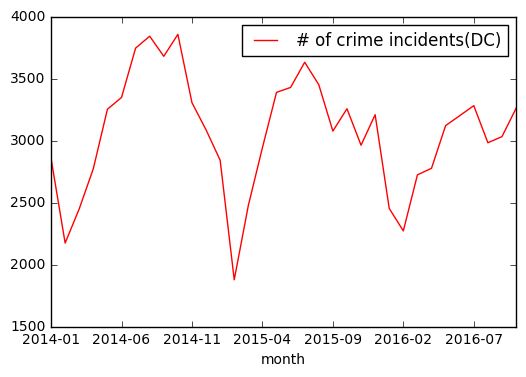

In [40]:
%matplotlib inline
import pandas as pd

result = _
df = pd.DataFrame(result)
df.columns = ['month', '# of crime incidents(DC)']
df.plot(x = 'month', y = '# of crime incidents(DC)', color='Red')

In [41]:
%%sql
SELECT t.year_month, count(*)
FROM fact_crime c, dim_time t, dim_cluster cl
WHERE c.time_key = t.time_key AND c.cluster_key = cl.cluster_key
    AND t.year_month between '2014-01' AND '2016-10' 
    AND cl.cluster_cd = '5'
GROUP BY t.year_month
ORDER BY year_month

34 rows affected.


year_month,count
2014-01,32
2014-02,35
2014-03,39
2014-04,35
2014-05,61
2014-06,55
2014-07,56
2014-08,72
2014-09,71
2014-10,59


The seasonal trend is also shown in the trend of Foggy bottom.

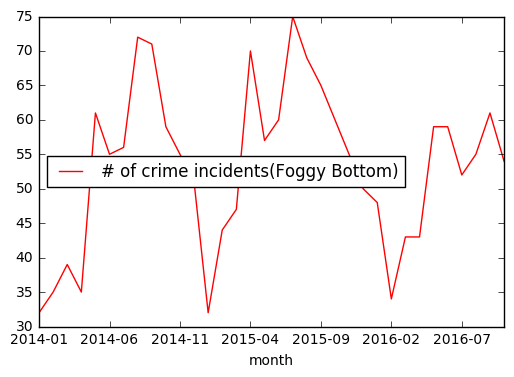

In [42]:
result = _
df = pd.DataFrame(result)
df.columns = ['month', '# of crime incidents(Foggy Bottom)']
df.plot(x = 'month', y = '# of crime incidents(Foggy Bottom)', color='Red')

Most of the crime incidents are related to theft. 

In [43]:
%%sql
SELECT t.year_month, o.offense_type, count(*)
FROM fact_crime c, dim_time t, dim_offense o, dim_cluster cl
WHERE c.time_key = t.time_key AND c.cluster_key = cl.cluster_key AND c.offense_key = o.offense_key
    AND t.year_month between '2014-01' AND '2016-10' 
    AND cl.cluster_cd = '5'
GROUP BY t.year_month, o.offense_type
ORDER BY t.year_month, o.offense_type

189 rows affected.


year_month,offense_type,count
2014-01,BURGLARY,1
2014-01,ROBBERY,2
2014-01,SEX ABUSE,1
2014-01,THEFT F/AUTO,2
2014-01,THEFT/OTHER,26
2014-02,ASSAULT W/DANGEROUS WEAPON,1
2014-02,BURGLARY,1
2014-02,MOTOR VEHICLE THEFT,1
2014-02,ROBBERY,3
2014-02,THEFT F/AUTO,2


In [44]:
%%sql
SELECT  o.offense_type, count(*)
FROM fact_crime c, dim_time t, dim_offense o, dim_cluster cl
WHERE c.time_key = t.time_key AND c.cluster_key = cl.cluster_key AND c.offense_key = o.offense_key
    AND t.year ='2016' 
    AND cl.cluster_cd = '5'
GROUP BY  o.offense_type
ORDER BY o.offense_type

7 rows affected.


offense_type,count
ASSAULT W/DANGEROUS WEAPON,16
BURGLARY,22
MOTOR VEHICLE THEFT,16
ROBBERY,22
SEX ABUSE,4
THEFT F/AUTO,109
THEFT/OTHER,336


<Container object of 7 artists>

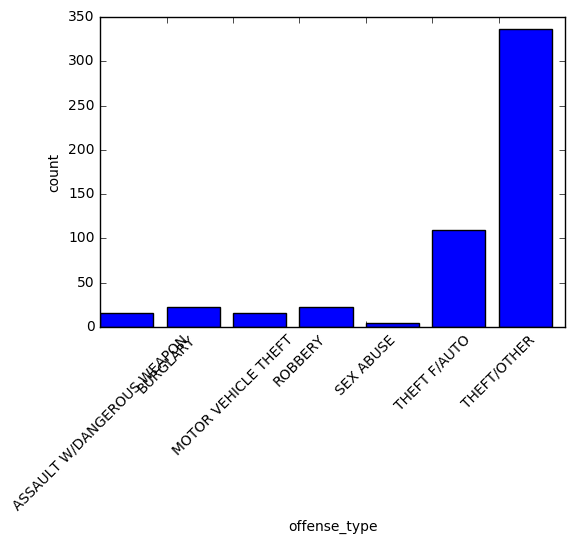

In [45]:
result = _
result.bar()

### 2. Transformation :

Inserting and Deleting the data from dimension table is below. 

In [46]:
%%sql
INSERT INTO DIM_Offense
VALUES (26, 'MURDER', 'murder_desc', 'GUN');

1 rows affected.


[]

In [47]:
%%sql
SELECT * from DIM_Offense WHERE offense_key = 26;

1 rows affected.


offense_key,offense_type,offense_desc,method
26,MURDER,murder_desc,GUN


In [48]:
%%sql
DELETE FROM DIM_Offense WHERE offense_key = 26;

1 rows affected.


[]

### 3. Our thinking

#### searching data
Although there are many dimension tables, it was simple and intuitive to join all of them, only with surrogate keys. There is no need to modify any data since they are already adjusted for our analysis purpose. 

#### Transforming data
We transformed dimension tables, and inserting and updating dimension table data were also simple and easy 

But we need to pay attention when we delete data from dimension table, since data that has the deleted info are still in the fact_table. In my opinion, there should be some rules to deal with that kinds of situation, and data in fact table must be processed than the data in diension table OR both table should be processed simultaneously. 
Updating the fact table is also what we need to te be careful of. 

## Bonus (10 points for one of A or B)


### Option A - Automating ETL

Consider the work you did to load your original raw dataset and then transform it into a dimensional model for analysis.  What would it take to automate this process?  How often would you need to update the data?  Could you easily automate any data cleaning steps?  What checks would you need to put in place to ensure quality?  Would humans need to be involved, or could you automate it all?

Discuss.

#### Our answer
The star schema framework we developed allows us to automate the data load process as well as incorporate it into a star and further use join function to relate them. It requires us to identify the relationship between attributes and make sure that the data quality is sustained in order to generate validate and useful outcomes. In this case, we suggest that considering the DC crime data is being posted each year, the discussion of data cleaning plan should be preferably conducted on a yearly basis. Currently several steps of automatic data cleaning are being processed, including the checking of data type, the exanimating of raw data does not exceed a reasonable range, and the transformation of missing value; however, some of the logical check, for example using X and Y axis data to make sure the location is corresponding to the precise cluster information, has not yet been included into our checking process. This is why there are certain times human involvement will be needed in order to make sure the consistency of the data or to check if any information being overlapped; especially in the cases when new unrelated data or external data being added. Like what we mentioned in the star schema diagram, when administrating new data from the criminals, victims or from other cities and states, human involvement needed to be added, in order to initialize or inspect the existing automated process.
